In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
def exact(x):
  return 1 + 2* x + 4 * x**2

In [14]:
class Quad_Model(keras.Model):
  def __init__(self, *args, **kwargs):
    super(Quad_Model, self).__init__(*args, **kwargs)
    self.theta_0 = tf.Variable(np.random.randn(), name = "theta_0")
    self.theta_1 = tf.Variable(np.random.randn(), name = "theta_1")
    self.theta_2 = tf.Variable(np.random.randn(), name = "theta_2")

  def call(self, x):
    return self.theta_0 + self.theta_1 * x + self.theta_2 * tf.pow(x, 2)

In [15]:
def creat_train_data(N, simga = 0.1):
  x_data = np.random.uniform(0.0 , 1.0, N)
  noise = np.random.normal(scale = sigma , size = N)
  y_data = exact(x_data)
  return x_data, y_data + noise

In [16]:
# Gaussian noise
sigma = 0.05

# Number of data points
N = 12800

# Batch Size
batch_size = 64

In [17]:
x_data, y_data = creat_train_data(N, sigma)

In [18]:
model = Quad_Model()

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
train_dataset = train_dataset.shuffle(N).batch(batch_size)

In [20]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.1)
loss_fn = tf.keras.losses.MeanSquaredError()

In [21]:
epochs = 4

# Train over number of epochs
for epoch in range(epochs):
    print(f"\nStart of epoch {epoch + 1}")
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            y_batch_pred = model(x_batch_train)
            loss_value = loss_fn(y_batch_pred, y_batch_train)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        if step % 50 == 0:
          print(f"Training loss (for one batch) at batch {step}: {loss_value}")



Start of epoch 1
Training loss (for one batch) at batch 0: 39.318416595458984
Training loss (for one batch) at batch 50: 0.22835280001163483
Training loss (for one batch) at batch 100: 0.04472389444708824
Training loss (for one batch) at batch 150: 0.016725637018680573

Start of epoch 2
Training loss (for one batch) at batch 0: 0.011514125391840935
Training loss (for one batch) at batch 50: 0.013022517785429955
Training loss (for one batch) at batch 100: 0.02256164140999317
Training loss (for one batch) at batch 150: 0.024273846298456192

Start of epoch 3
Training loss (for one batch) at batch 0: 0.0338311530649662
Training loss (for one batch) at batch 50: 0.007658145856112242
Training loss (for one batch) at batch 100: 0.023959217593073845
Training loss (for one batch) at batch 150: 0.028053347021341324

Start of epoch 4
Training loss (for one batch) at batch 0: 0.002948240377008915
Training loss (for one batch) at batch 50: 0.03178013861179352
Training loss (for one batch) at batch

In [22]:
model.trainable_variables

[<tf.Variable 'theta_0:0' shape=() dtype=float32, numpy=1.0415856>,
 <tf.Variable 'theta_1:0' shape=() dtype=float32, numpy=2.0993302>,
 <tf.Variable 'theta_2:0' shape=() dtype=float32, numpy=4.0158815>]

In [23]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

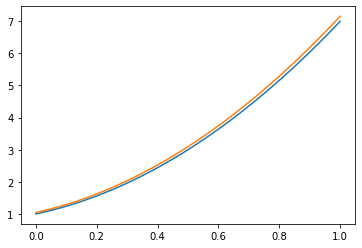

In [27]:
x_plot = np.linspace(0.0, 1.0, 100)

plt.plot(x_plot, exact(x_plot))
plt.plot(x_plot, model(x_plot))